In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logomaker
import os
import pickle
from scipy.stats import pearsonr

In [2]:
def get_information_content(x):
    ic = x * np.log2((x + .001) / .25)
    if ic > 0:
        return(ic)
    else:
        return(0.0)

In [3]:
data_dir = "../data/"
results_dir = "../Results/PWM-G2A-CV/"
L_TFs = ["GABPA", "PRDM5", "SP140", "ZNF362", "ZNF407"]
F_TFs = [_ for _ in os.listdir("{}/CHS/".format(data_dir)) if _ not in L_TFs]
assays = ["CHS", "GHTS"]

In [4]:
def align_ppms(to_align):
    max_w = np.max([_.shape[0] for _ in to_align])
    to_return = np.zeros([3*max_w, 4, len(to_align)])
    template_i, template = [[i, x] for i, x in enumerate(to_align) if x.shape[0] == max_w][0]
    padded_template = np.zeros([3*max_w,4])
    padded_template[max_w:(2*max_w),:] = template
    to_return[max_w:(2*max_w),:,template_i] = template
    for i, ppm in enumerate(to_align):
        if i != template_i:
            w = ppm.shape[0]
            pccs_for = np.nan_to_num([pearsonr(ppm.flatten(),padded_template[j:j+w,:].flatten())[0] for j in range(3*max_w - w)])
            pccs_rc = np.nan_to_num([pearsonr(ppm[::-1,::-1].flatten(),padded_template[j:j+w,:].flatten())[0] for j in range(3*max_w - w)])
            if np.max(pccs_for) > np.max(pccs_rc):
                max_i = np.argmax(pccs_for)
                to_return[max_i:max_i+w,:,i] = ppm
            else:
                max_i = np.argmax(pccs_rc)
                to_return[max_i:max_i+w,:,i] = ppm[::-1,::-1]
        else:
            pass

    to_return = to_return[np.where(np.sum(to_return, axis=(1,2)) != 0)[0],:,:]
    return([to_return[:,:,i] for i in range(len(to_align))])

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation 

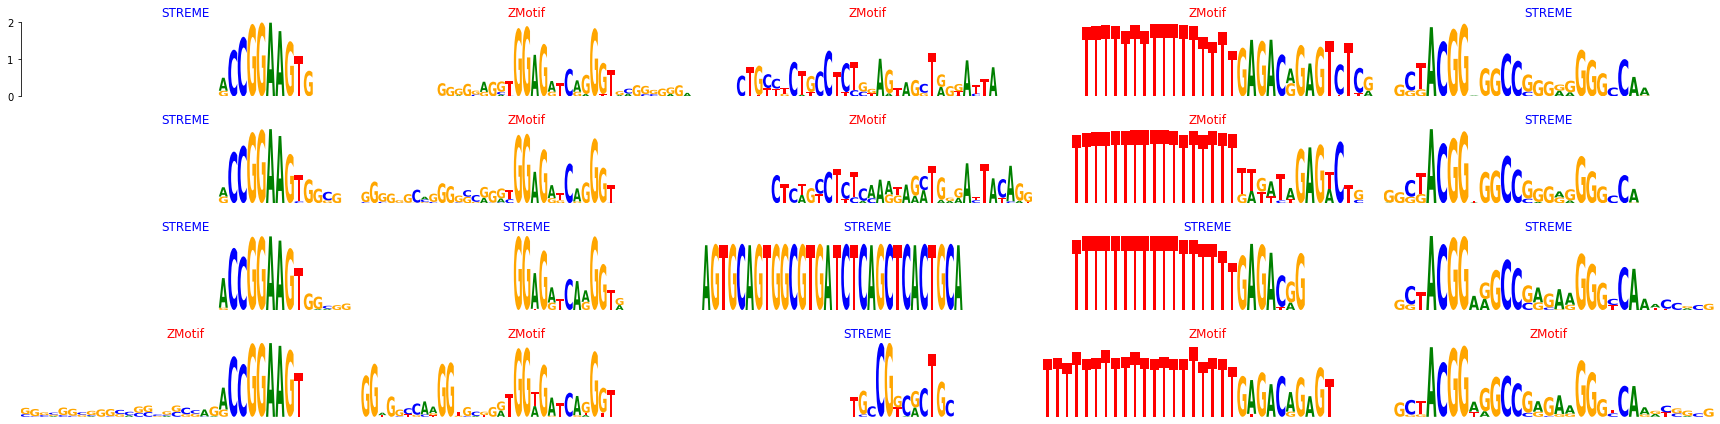

In [5]:
fig, axes = plt.subplots(4, len(L_TFs), figsize=(24,6), tight_layout=True)
for TF_i, TF in enumerate(L_TFs):
    to_align = []
    og_files = []
    for a1 in assays:
        for a2 in assays:
            with open("{}/{}-{}-{}.pkl".format(results_dir, TF, a1, a2), "rb") as f:
                data = pickle.load(f)
            PPMs, AUCs = data
            metadata, ppm = PPMs[np.argmax(AUCs)]
            og_files.append(metadata)
            ppm = pd.DataFrame(ppm, columns=["A", "C", "G", "T"])
            to_align.append(ppm.values)
    aligned_ppms = align_ppms(to_align)
    for plot_i, ppm in enumerate(aligned_ppms):
        ppm = pd.DataFrame(ppm, columns=["A", "C", "G", "T"])
        ax = axes[plot_i, TF_i]
        logomaker.Logo(ppm.applymap(get_information_content), ax=ax)
        ax.set_ylim([0,2])
        metadata = og_files[plot_i]
        if "streme" in metadata:
            title = "STREME"
        else:
            title = "ZMotif"
        
        if title == "STREME":
            ax.set_title(title, fontdict={"color" : "blue"})
        else:
            ax.set_title(title, fontdict={"color" : "red"})
        if plot_i == 0 and TF_i == 0:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.set_xticks([])
        else:
            ax.axis("off")

In [6]:
with open("PWM-G2A-Leaderboard.txt", "w") as f:
    for TF in L_TFs:
        for a1 in assays:
            for a2 in assays:
                with open("{}/{}-{}-{}.pkl".format(results_dir, TF, a1, a2), "rb") as pkl:
                    data = pickle.load(pkl)
                PPMs, AUCs = data
                metadata, ppm = PPMs[np.argmax(AUCs)]
                ppm = pd.DataFrame(ppm, columns=["A", "C", "G", "T"])
                print(">{0} {0}_{1}_{2}".format(TF, a1, a2), file=f)
                for i in range(ppm.shape[0]):
                    print(" ".join(["%.5f" % v for v in ppm.values[i,:]]), file=f)
                print(file=f)

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation 

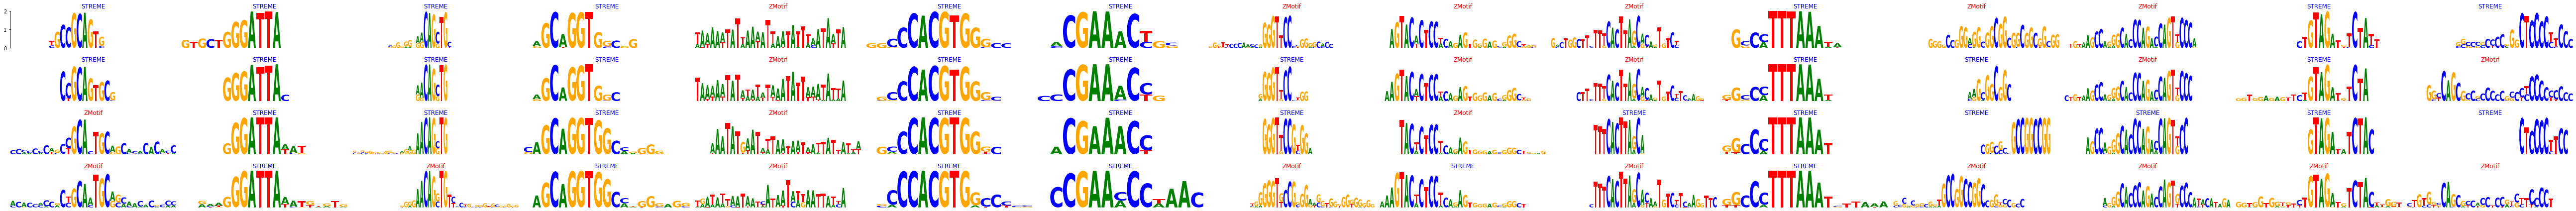

In [7]:
fig, axes = plt.subplots(4, len(F_TFs), figsize=(72,6), tight_layout=True)
for TF_i, TF in enumerate(F_TFs):
    to_align = []
    og_files = []
    for a1 in assays:
        for a2 in assays:
            with open("{}/{}-{}-{}.pkl".format(results_dir, TF, a1, a2), "rb") as f:
                data = pickle.load(f)
            PPMs, AUCs = data
            metadata, ppm = PPMs[np.argmax(AUCs)]
            og_files.append(metadata)
            ppm = pd.DataFrame(ppm, columns=["A", "C", "G", "T"])
            to_align.append(ppm.values)
    aligned_ppms = align_ppms(to_align)
    for plot_i, ppm in enumerate(aligned_ppms):
        ppm = pd.DataFrame(ppm, columns=["A", "C", "G", "T"])
        ax = axes[plot_i, TF_i]
        logomaker.Logo(ppm.applymap(get_information_content), ax=ax)
        ax.set_ylim([0,2])
        metadata = og_files[plot_i]
        if "streme" in metadata:
            title = "STREME"
        else:
            title = "ZMotif"
        
        if title == "STREME":
            ax.set_title(title, fontdict={"color" : "blue"})
        else:
            ax.set_title(title, fontdict={"color" : "red"})
        if plot_i == 0 and TF_i == 0:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.set_xticks([])
        else:
            ax.axis("off")

In [8]:
with open("PWM-G2A-Final.txt", "w") as f:
    for TF in F_TFs:
        for a1 in assays:
            for a2 in assays:
                with open("{}/{}-{}-{}.pkl".format(results_dir, TF, a1, a2), "rb") as pkl:
                    data = pickle.load(pkl)
                PPMs, AUCs = data
                metadata, ppm = PPMs[np.argmax(AUCs)]
                ppm = pd.DataFrame(ppm, columns=["A", "C", "G", "T"])
                print(">{0} {0}_{1}_{2}".format(TF, a1, a2), file=f)
                for i in range(ppm.shape[0]):
                    print(" ".join(["%.5f" % v for v in ppm.values[i,:]]), file=f)
                print(file=f)